In [ ]:
pip show fastai

Name: fastai
Version: 2.5.2
Summary: fastai simplifies training fast and accurate neural nets using modern best practices
Home-page: https://github.com/fastai/fastai/tree/master/
Author: Jeremy Howard, Sylvain Gugger, and contributors
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: torchvision, pip, pyyaml, pillow, scipy, packaging, scikit-learn, pandas, spacy, requests, torch, fastdownload, fastprogress, matplotlib, fastcore
Required-by: 


In [ ]:
from fastai.vision.all import *

In [ ]:
path = untar_data(URLs.PETS)

In [ ]:
path.ls

<bound method Path.ls of Path('/root/.fastai/data/oxford-iiit-pet')>

In [ ]:
files=get_image_files(path/"images")

In [ ]:
len(files)

7390

In [ ]:
files[0]

Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_26.jpg')

In [ ]:
files[1]

Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_44.jpg')

In [ ]:
files[6]

Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_102.jpg')

# Cats are start with capital and dogs are start with small letter

In [ ]:
def label_func(f): return f[0].isupper()

In [ ]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

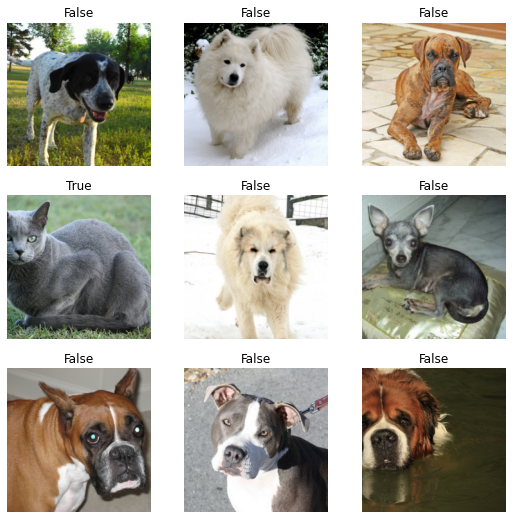

In [ ]:
dls.show_batch()

In [ ]:
?cnn_learner

In [ ]:
learn=cnn_learner(dls,resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
learn.predict(files[0])

('False', tensor(0), tensor([0.9628, 0.0372]))

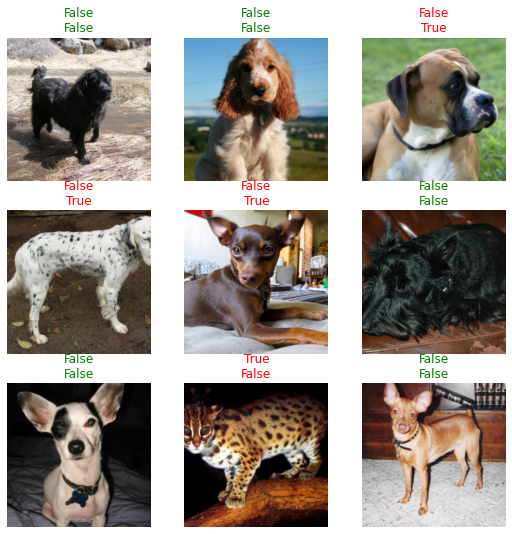

In [ ]:
learn.show_results()

In [ ]:
files[0].name

'saint_bernard_26.jpg'

In [ ]:
pat = r'^(.*)_\d+.jpg'

In [ ]:
pat

'^(.*)_\\d+.jpg'

In [ ]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(224))

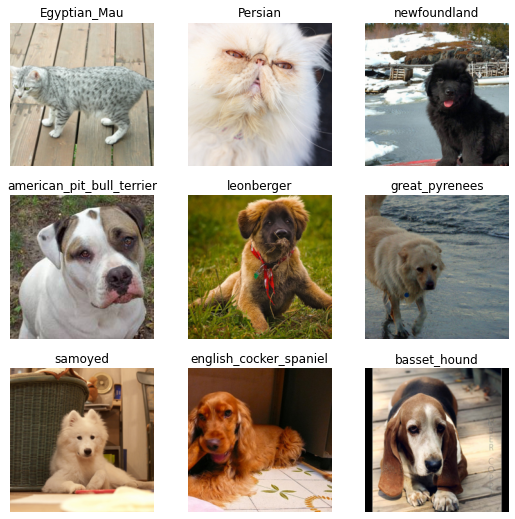

In [ ]:
dls.show_batch()

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(valley=0.0008317637839354575)

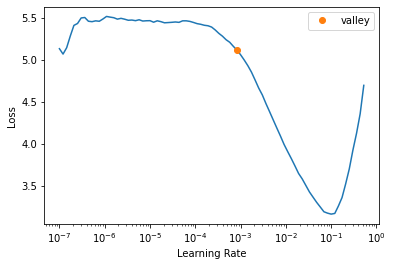

In [ ]:
learn.lr_find()

In [ ]:
learn.fine_tune(2, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.237142,0.379980,0.121110,01:09


epoch,train_loss,valid_loss,error_rate,time
0,0.517514,0.359480,0.115020,01:18
1,0.252183,0.241607,0.068336,01:17


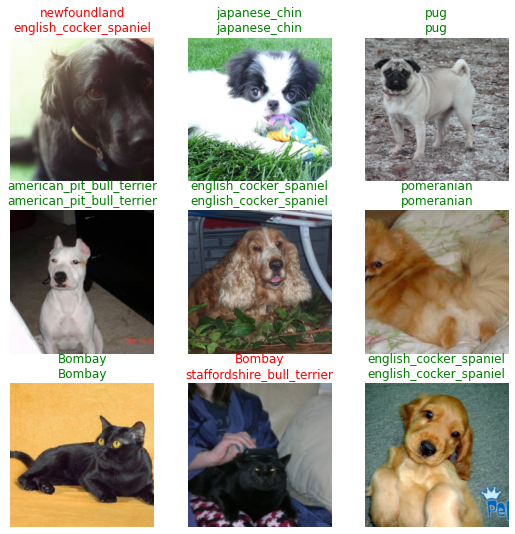

In [ ]:
learn.show_results()

In [ ]:
inter=Interpretation.from_learner(learn)

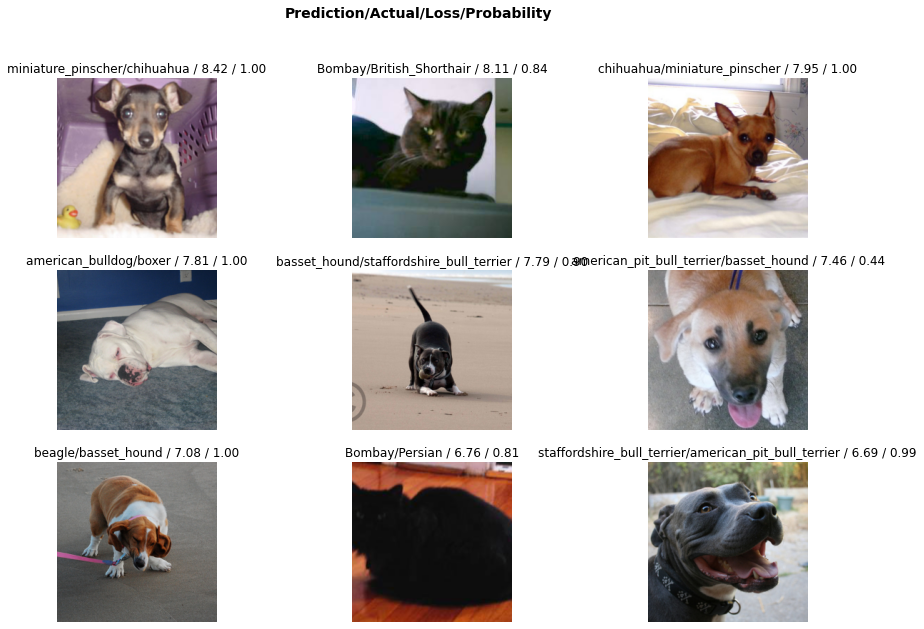

In [ ]:
inter.plot_top_losses(9,figsize=(15,10))

In [ ]:
 learn.predict("/content/cat-4611189__480.jpg")

('Maine_Coon',
 tensor(6),
 tensor([1.1471e-02, 4.5924e-02, 6.9382e-06, 2.4239e-04, 6.6117e-03, 1.2628e-02,
         9.1164e-01, 3.1295e-04, 1.0290e-02, 2.7800e-05, 1.9835e-05, 9.3632e-05,
         2.0362e-05, 1.4142e-06, 9.0371e-05, 1.7985e-06, 1.1489e-05, 1.1286e-05,
         1.2504e-06, 5.8808e-06, 2.3756e-07, 1.0669e-05, 2.8229e-04, 2.8602e-05,
         2.1637e-05, 1.3628e-05, 6.8580e-06, 4.9484e-06, 3.9141e-06, 6.7289e-05,
         2.5968e-05, 2.8625e-06, 2.1258e-06, 3.4317e-05, 1.4605e-06, 2.3740e-05,
         5.7078e-05]))

In [ ]:
img = PILImage.create("/content/cat-4611189__480.jpg")

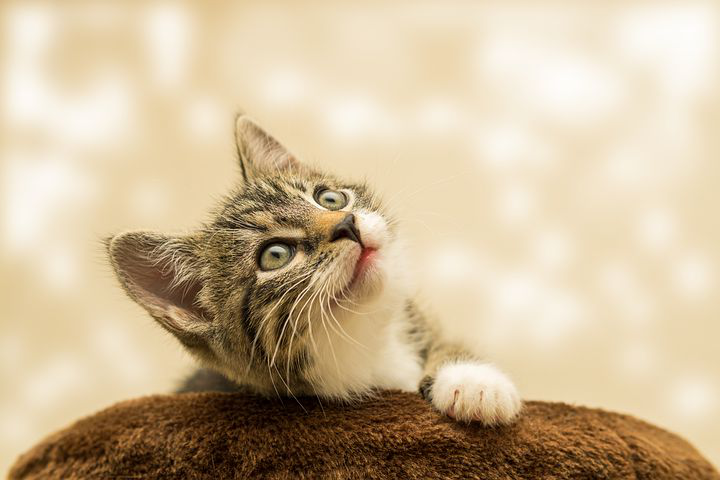

In [ ]:
img

In [ ]:
learn.predict(img)

('Maine_Coon',
 tensor(6),
 tensor([1.1471e-02, 4.5924e-02, 6.9382e-06, 2.4239e-04, 6.6117e-03, 1.2628e-02,
         9.1164e-01, 3.1295e-04, 1.0290e-02, 2.7800e-05, 1.9835e-05, 9.3632e-05,
         2.0362e-05, 1.4142e-06, 9.0371e-05, 1.7985e-06, 1.1489e-05, 1.1286e-05,
         1.2504e-06, 5.8808e-06, 2.3756e-07, 1.0669e-05, 2.8229e-04, 2.8602e-05,
         2.1637e-05, 1.3628e-05, 6.8580e-06, 4.9484e-06, 3.9141e-06, 6.7289e-05,
         2.5968e-05, 2.8625e-06, 2.1258e-06, 3.4317e-05, 1.4605e-06, 2.3740e-05,
         5.7078e-05]))